In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,KFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import Scikitplot as skl
#sns.set()

Problem Statement- dataset utilizes data from 2014 Major League Baseball so that based 2014 datset develop a algorithm to predict 2015  season win chances ,based on features

In [2]:
baseball=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


seems no values is missing all are 30 count, deviation is not so much we will see through dist plot to check skewness SO,AB ,RA, ER little bit higher std.

In [4]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


so in this data set no missing value and no object column all are integer except ERA column have float value

In [5]:
baseball.shape  #so data set having 30 rows and 17 column

(30, 17)

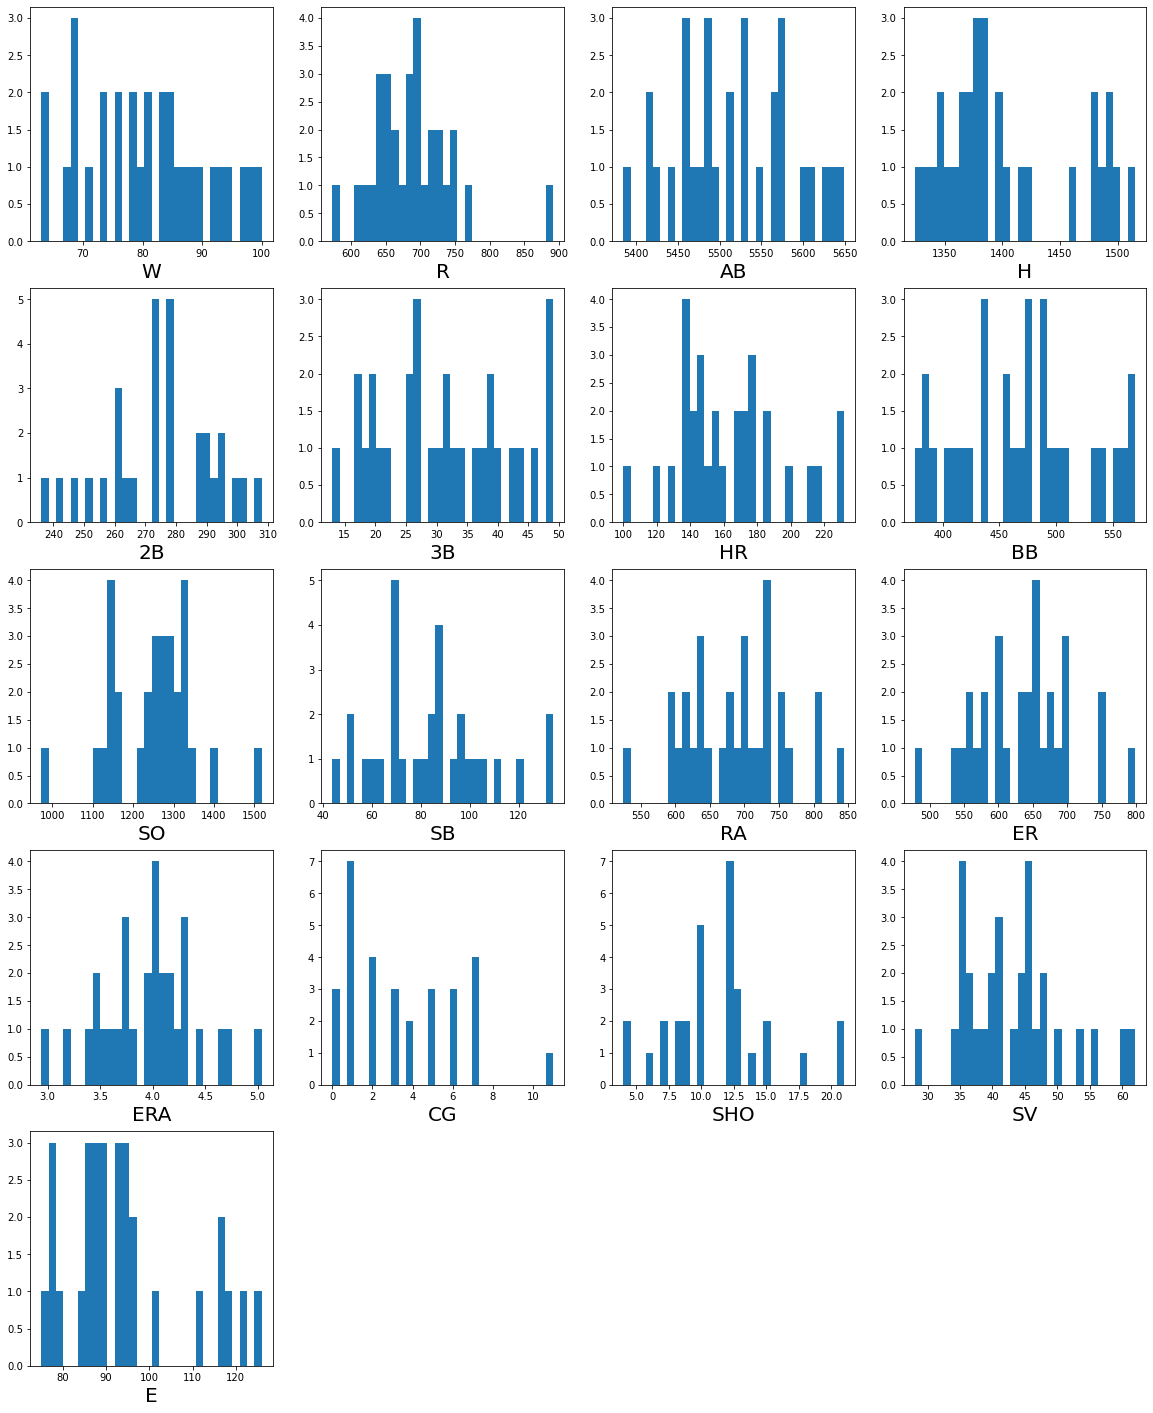

In [6]:
#lest plot data dist to see how our data is distributed
plt.figure(figsize=(20,25))
plotnumber=1
for column in baseball:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        plt.hist(baseball[column],bins=30)
        plt.xlabel(column,fontsize=20)
        plotnumber+=1  

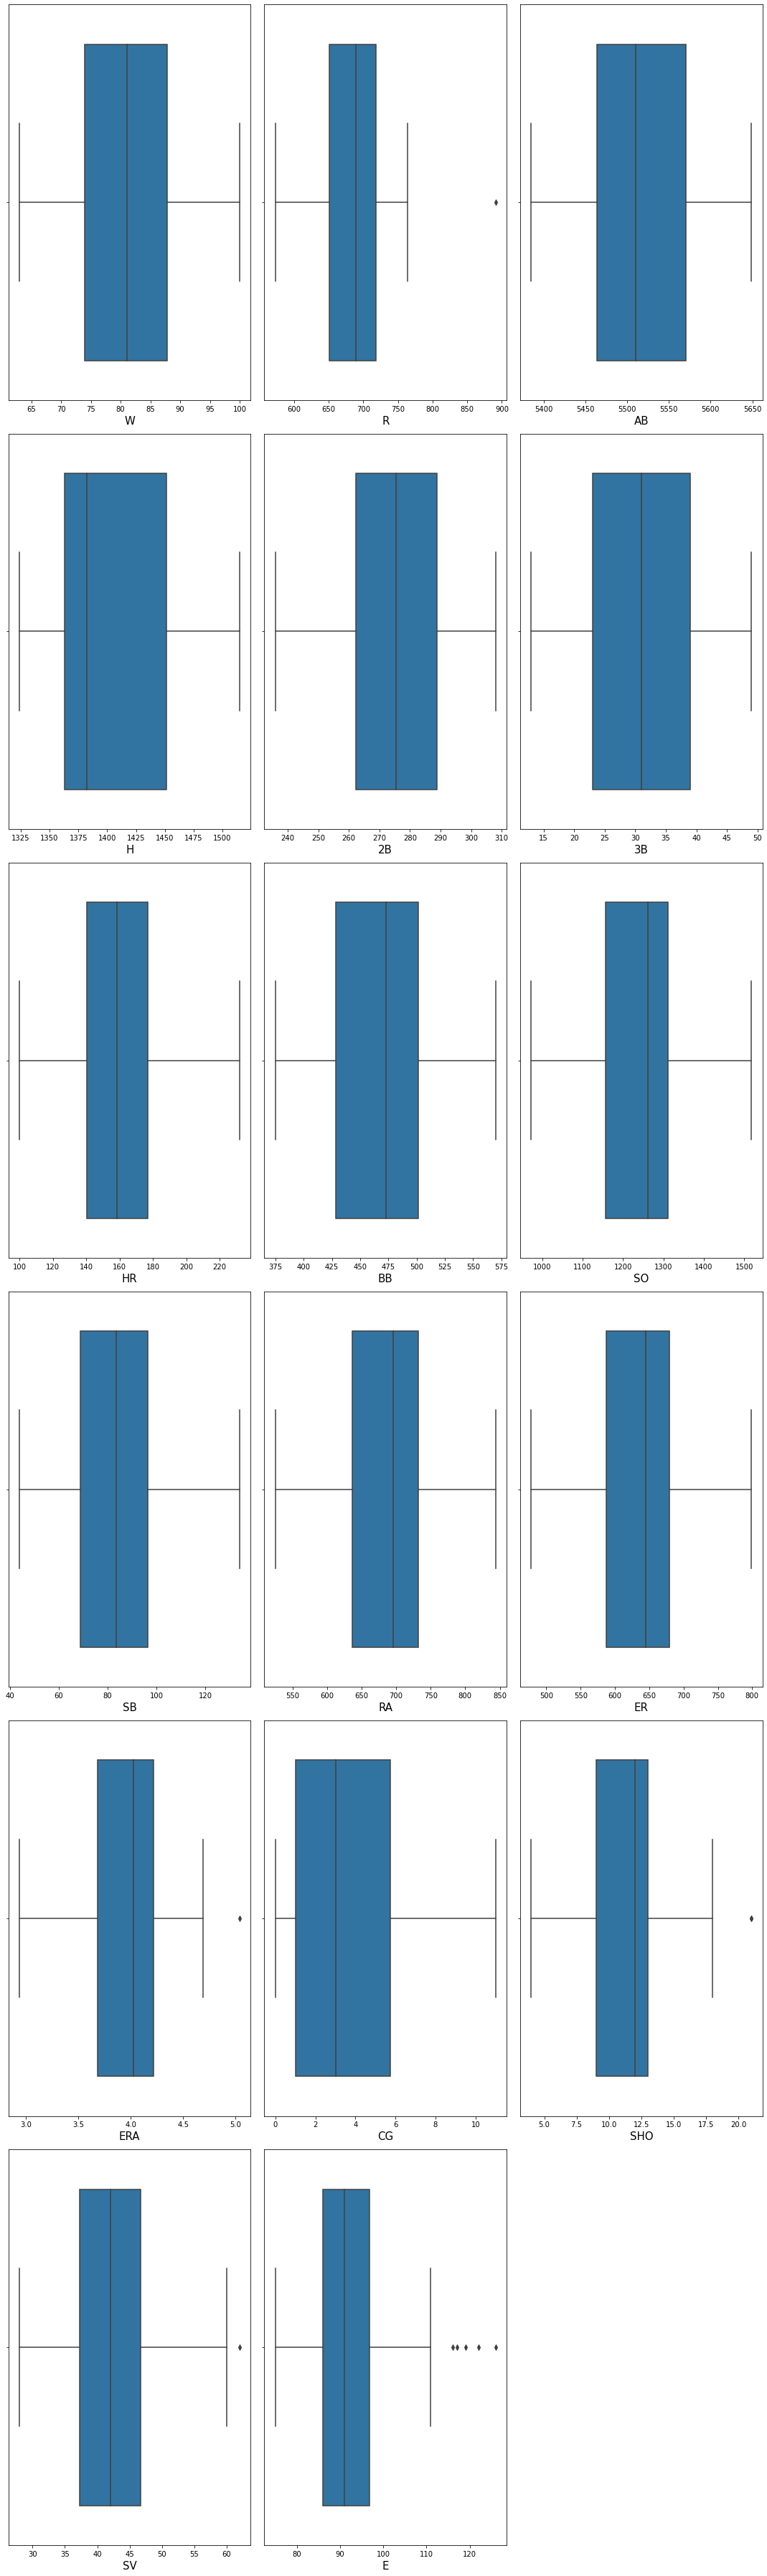

In [7]:
#lest do with boxplot for outlier detection
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in baseball:
    if graph<=18:
        ax=plt.subplot(6,3,graph)
        ax=sns.boxplot(baseball[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

In [8]:
baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

so we see few outliers only present in R,H,CG,E column only. lets remove outliers with  z score method

In [9]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(baseball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [10]:
print('row number\n', np.where(z>3)[0])
print('column number\n', np.where(z>3)[1])

row number
 [5]
column number
 [1]


In [11]:
index=np.where(z>3)[0]

In [12]:
baseball=baseball.drop(baseball.index[index])
baseball.shape

(29, 17)

In [13]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


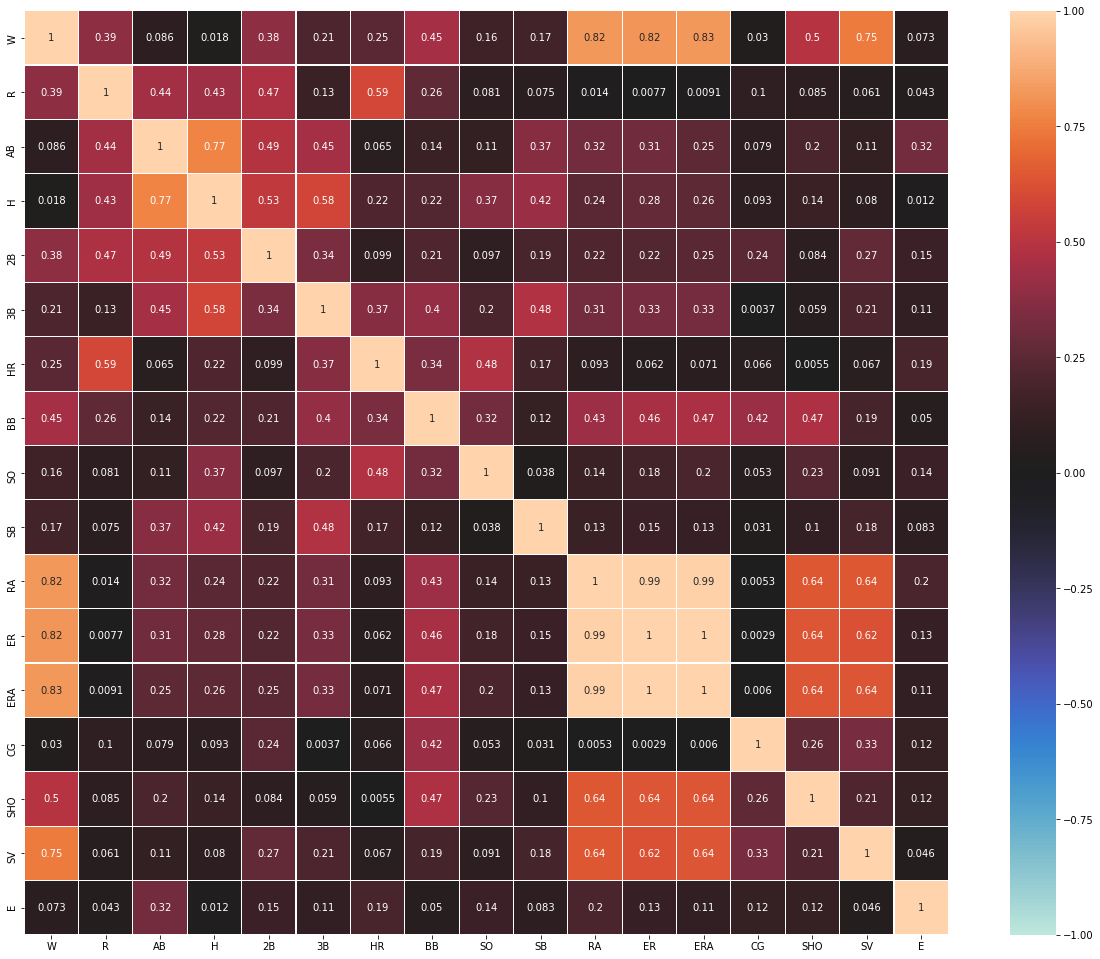

In [14]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=baseball.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [15]:
corr_matrix=baseball.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.749290
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
CG     0.029594
H     -0.018360
E     -0.072858
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

bles(2B), Runs(R),  Homeruns(HR), , 
Shutouts(CG), Saves(SHO), Complete Games(SV) Walks(BB),Stolen Bases(SB) ,SO are postive realtion with win, other column have negative realtion with win

In [16]:
#divide dataset into features and label
X=baseball.drop(columns='W',axis=1)
Y=baseball.W

# Scatter plot to see features relation with class

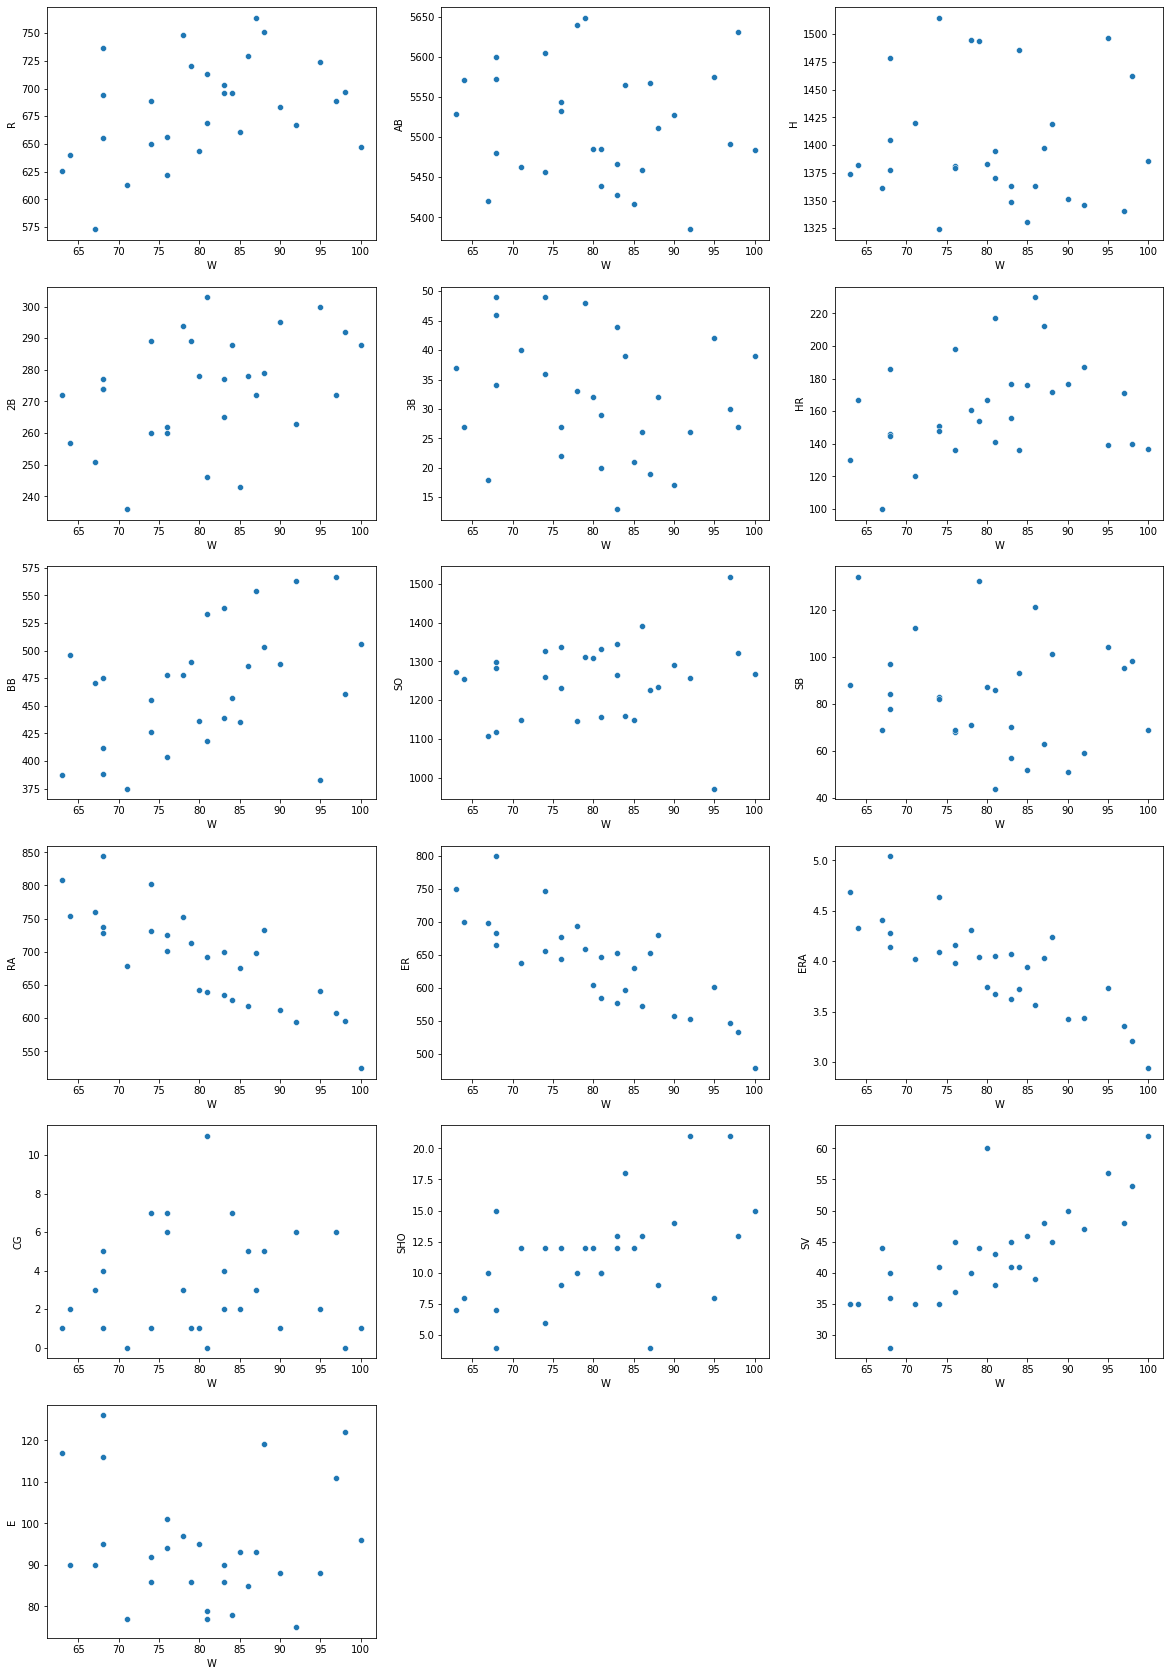

In [17]:
#lets see how features is related to class 
plt.figure(figsize=(20,30))
plotnumber=1
for column in X:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(Y,X[column])
    plotnumber+=1
plt.show()

Observation-RA, ER,ERA shows negative linear relation with class  SV column shows linaer positive relation with class

In [18]:
#feature scaling  
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

In [19]:
#train test split the model now
x_train,x_test,y_train,y_test=train_test_split(x_scaler,Y,test_size=.20,random_state=20)

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
rfr.score(x_train,y_train)

0.951386331799418

In [22]:
y_pred=rfr.predict(x_test)

In [23]:
mean_absolute_error(y_test,y_pred)

4.823333333333335

In [24]:
mean_squared_error(y_test,y_pred)

34.06826666666668

oh so error is quite high lets do regularization of model and see what can i do

# Hyperparameter Tuning of RandomForest model

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param=  {'n_estimators':[100],

        'criterion': ['mse'],
        'max_depth':range(2,16,2),
        'min_samples_split':range(2,14,2),
        'min_samples_leaf':range(1,10,1),
        'min_weight_fraction_leaf':(0.01,0.02,0.03,0.1,.3,.6,.8,.9,1)}

In [27]:
grid_search=GridSearchCV(estimator=rfr,param_grid=param,cv=5)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 16, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 14, 2),
                         'min_weight_fraction_leaf': (0.01, 0.02, 0.03, 0.1,
                                                      0.3, 0.6, 0.8, 0.9, 1),
                         'n_estimators': [100]})

In [81]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 100}

In [84]:
rfr=RandomForestRegressor(criterion='mse',max_depth=12,min_samples_leaf=2,min_impurity_split=4,min_weight_fraction_leaf=.01, n_estimators=100)

In [85]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, min_impurity_split=4, min_samples_leaf=2,
                      min_weight_fraction_leaf=0.01)

In [86]:
rfr.score(x_train,y_train)

0.9213136069109537

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
cross_val_score(rfr,x_scaler,Y,cv=3).mean()

-0.18545649373492334

so cross val score is negative value not satisfactory result from this model lets try with another one

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [121]:
lr.score(x_train,y_train)

0.9849511032695472

In [122]:
y_pred=lr.predict(x_test)

In [123]:
mean_absolute_error(y_pred,y_test)

6.863426135239188

In [124]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [125]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)# aplha is learning rate ,max_iter means how many time appear in 
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [126]:
alpha=lassocv.alpha_
alpha

0.010721984088362042

In [127]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.010721984088362042)

In [128]:
lasso_reg.score(x_test,y_test)

-0.9622516896040378

In [129]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [130]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [131]:
ridgecv.alpha_

0.071

In [132]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.071)

In [133]:
ridge_l1.score(x_train,y_train)

0.9837991082460248

So Ridge score is good i will do build other model and compare then finalize best among all

# ADABoost 

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [63]:
#model prediction on train data
y_pred=ada.predict(x_train)

In [64]:
ada.score(x_train,y_train)

0.9949326323045303

In [65]:
print('R square score',r2_score(y_train,y_pred))

R square score 0.9949326323045303


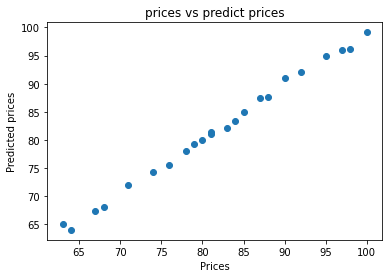

In [66]:
#lets visualize relation between train and predicted data
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('prices vs predict prices')
plt.show()

model score and visualization between train data and predicted data shows model is overfitting lets do hyperparameter tuning and cross validation

In [67]:
dt=DecisionTreeRegressor()

In [68]:
params={'n_estimators':[30,45,49,59,63,89,101],'learning_rate':[0.001,0.21,.1,.2,0.3,.4,.45,.9]}

In [71]:
rnd_srch= RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [72]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.21, 0.1, 0.2,
                                                          0.3, 0.4, 0.45, 0.9],
                                        'n_estimators': [30, 45, 49, 59, 63, 89,
                                                         101]})

In [73]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=49)

In [74]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=.001,n_estimators=101)

In [75]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.001,
                  n_estimators=101)

In [76]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.001,n_estimators=101)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.05281899109792276


In [79]:
#cross validation
cross_val_score(ada,x_scaler,Y,cv=3).mean()

-0.2548477500131758

# XGB Model

In [80]:
import xgboost as xgb

In [81]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred=xgb.predict(x_test)
print('***********R2 Score**********')
r2_score(y_test,y_pred)

***********R2 Score**********


0.2589570733651557

score is to low lets do hyperparameter tuning

In [83]:
param={
       'learning_rate':[0.001,0.003,0.1,0.3,0.5,0.7],
       
       
}

In [84]:
grid_searc=GridSearchCV(estimator=xgb,param_grid=param,cv=5)

In [85]:
grid_searc.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [86]:
grid_searc.best_params_

{'learning_rate': 0.5}

In [87]:
ada=AdaBoostRegressor(base_estimator=ada,learning_rate=.5)

In [88]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                                   learning_rate=0.001,
                                                   n_estimators=101),
                  learning_rate=0.5)

In [89]:
ada.score(x_train,y_train)

1.0

In [96]:
#Cross validation 
k_f=KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [97]:
cross_val_score(ada,x_scaler,Y,cv=5)

array([ 0.32159091, -5.39473684,  0.47887913,  0.46721311,  0.92334906])

In [98]:
cross_val_score(ada,x_scaler,Y,cv=5).mean()

-0.7832769723025725

CV score is negative model is overfitting issue,lets try with KNN regression

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [101]:
knn.score(x_train,y_train)

0.720628679704947

# Hyperparameter Tuning of KNN model

In [108]:
param={'n_neighbors':[3,5,7,9,11],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[16],
      }

In [109]:
grid_search=GridSearchCV(knn,param_grid=param,cv=5)

In [110]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [16],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform']})

In [111]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 16, 'n_neighbors': 5, 'weights': 'uniform'}

In [114]:
knn= KNeighborsRegressor(algorithm='auto',leaf_size=16,n_neighbors=5,weights='uniform')

In [115]:
knn.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=16)

In [116]:
y_pred=knn.predict(x_test)
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.37357863501483635


In [117]:
knn.score(x_train,y_train)

0.720628679704947

In [118]:
cross_val_score(knn,x_scaler,Y,cv=5).mean()

0.03984806734728634

In [134]:
#best model saving
import pickle
file='ridge_l1'
pickle.dump(ridge_l1,open(file,'wb'))